In [225]:
### This cell imports the aggregated percent_return.csv data as a Pandas dataframe
import pandas as pd

filepath = 'data/2020-09-01_2024-09-01/aggregated/percent_return.csv'
df = pd.read_csv(filepath)
# Set 'date' as the index
df.set_index('date', inplace=True)

print("Original Data:")
print(df)

Original Data:
                AAPL       ABBV       ABT      ACGL       ACN      ADBE  \
date                                                                      
2020-09-01 -1.338811 -18.864158 -9.241282 -3.906643 -5.357038  2.514565   
2020-09-02 -6.774596 -14.263371 -4.607810 -3.741745 -3.907720 -0.456879   
2020-09-03 -7.021093 -17.777920 -9.919912 -5.527812 -8.308451 -3.467415   
2020-09-04 -1.659347 -16.170629 -8.349083 -7.352068 -7.565702 -2.518576   
2020-09-08 -3.350961 -17.172482 -7.510794 -6.419512 -5.309134 -2.068281   
...              ...        ...       ...       ...       ...       ...   
2024-08-26  0.075116  -0.852487 -0.504397 -4.473917  0.700957  0.794547   
2024-08-27  0.787340  -1.829459 -0.433869 -4.121840  1.139734  2.420632   
2024-08-28 -0.736622  -0.853125 -0.645085 -4.987173 -1.332429 -1.351588   
2024-08-29 -0.244479  -1.207289 -0.943459 -3.602750 -0.417102  0.454989   
2024-08-30 -0.626294  -0.253636 -0.231265 -4.809146 -0.127923  0.386222   

         

In [226]:
### This cell creates the absolute correlation matrix for the company daily return data.

# Compute the correlation matrix
abs_corr_matrix = df.corr().abs()

print("\nAbsolute Correlation Matrix:")
print(abs_corr_matrix.head())

# Convert correlation to dissimilarity
dissimilarity_matrix = 1 - abs_corr_matrix

print("\nDissimilarity Matrix:")
print(dissimilarity_matrix.head())



Absolute Correlation Matrix:
          AAPL      ABBV       ABT      ACGL       ACN      ADBE       ADI  \
AAPL  1.000000  0.454798  0.517505  0.197551  0.634617  0.546315  0.627604   
ABBV  0.454798  1.000000  0.883554  0.069079  0.797818  0.068230  0.798909   
ABT   0.517505  0.883554  1.000000  0.108123  0.803273  0.198677  0.793184   
ACGL  0.197551  0.069079  0.108123  1.000000  0.159564  0.178591  0.146353   
ACN   0.634617  0.797818  0.803273  0.159564  1.000000  0.396244  0.825313   

           ADM       ADP      ADSK  ...       WTW        WY      WYNN  \
AAPL  0.462478  0.570738  0.476062  ...  0.511498  0.500413  0.359180   
ABBV  0.869790  0.886611  0.051943  ...  0.792795  0.933511  0.167072   
ABT   0.811975  0.864196  0.189390  ...  0.780992  0.860069  0.219463   
ACGL  0.162605  0.161266  0.175348  ...  0.236089  0.086150  0.248269   
ACN   0.754352  0.843640  0.336496  ...  0.761336  0.812287  0.305572   

           XEL       XOM       XYL       YUM       ZBH      ZB

In [227]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate linkage using dissimilarity matrix

dissimilarity_linkage_data = linkage(dissimilarity_matrix, method='complete')

C:\Users\rajra\AppData\Local\Temp\ipykernel_11680\192332908.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dissimilarity_linkage_data = linkage(dissimilarity_matrix, method='complete')


In [228]:
# Companies from Technology and Healthcare sectors
tech_companies = ['AAPL', 'MSFT', 'NVDA', 'ADBE', 'CRM', 'INTC', 'CSCO', 'QCOM', 'AMD', 'ORCL']
healthcare_companies = ['JNJ', 'UNH', 'PFE', 'MRK', 'ABBV', 'LLY', 'TMO', 'BMY', 'CI', 'GILD']

selected_companies = tech_companies + healthcare_companies

In [229]:
# Get dissimilarity for both of the selected tech and healthcare companies

selected_dissimilarity = linkage(dissimilarity_matrix.loc[selected_companies, selected_companies], method='complete')

# too much data to interpret since looking at all companies, use other selected dissimilarity above 
selected_dissimilarity_all = linkage(dissimilarity_matrix, method='complete')

C:\Users\rajra\AppData\Local\Temp\ipykernel_11680\1307023525.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  selected_dissimilarity = linkage(dissimilarity_matrix.loc[selected_companies, selected_companies], method='complete')
C:\Users\rajra\AppData\Local\Temp\ipykernel_11680\1307023525.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  selected_dissimilarity_all = linkage(dissimilarity_matrix, method='complete')


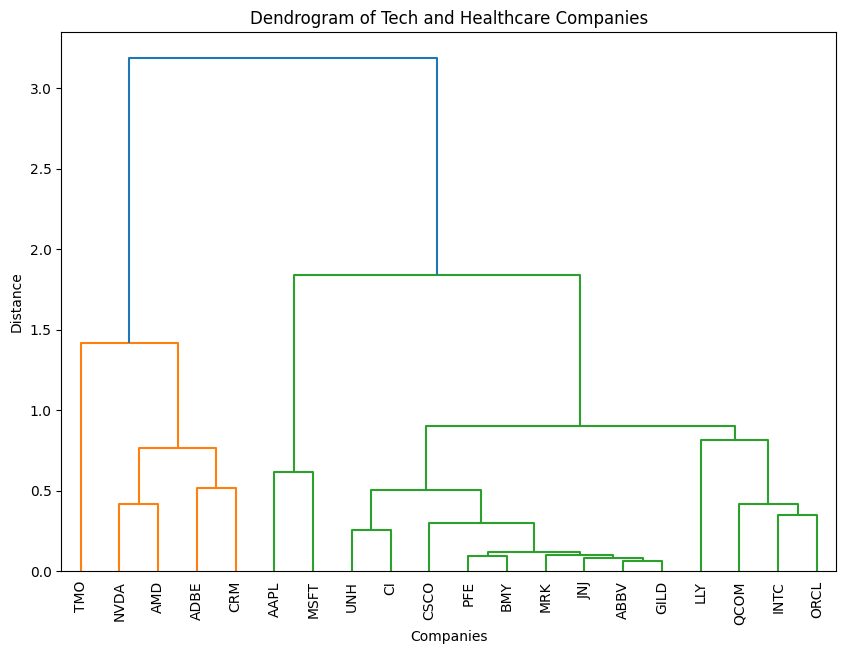

In [230]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 7))
dendrogram(selected_dissimilarity, labels=df[selected_companies].columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Tech and Healthcare Companies')
plt.xlabel('Companies')
plt.ylabel('Distance')
plt.show()

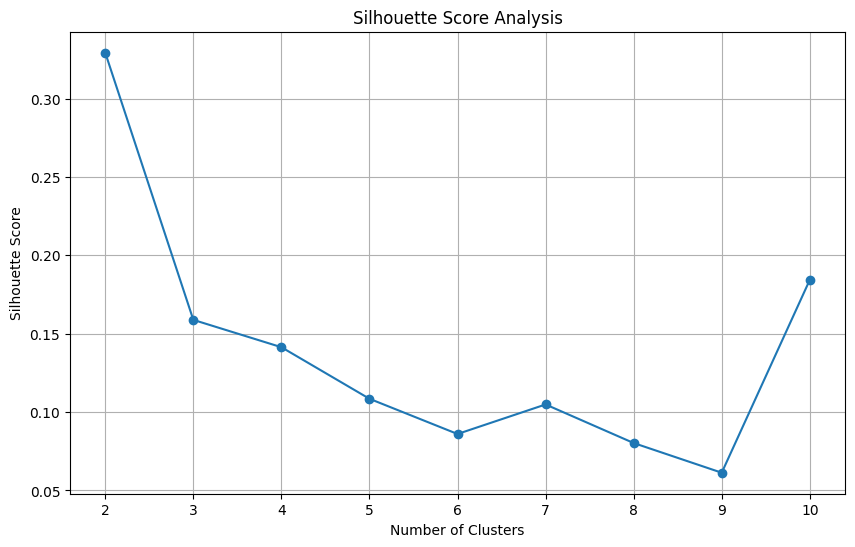

In [231]:
# For Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11) # range of clusters to test

silhouette_scores = []

for n_clusters in range_n_clusters:
    # Apply Agglomerative Clustering with a specified number of clusters
    cluster_labels = fcluster(selected_dissimilarity, n_clusters, criterion='maxclust')
    
    # Calculate the silhouette score for each number of clusters
    score = silhouette_score(df[selected_companies].T, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [232]:
import numpy as np

# To find the optimal number of clusters 
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
optimal_n_clusters

2

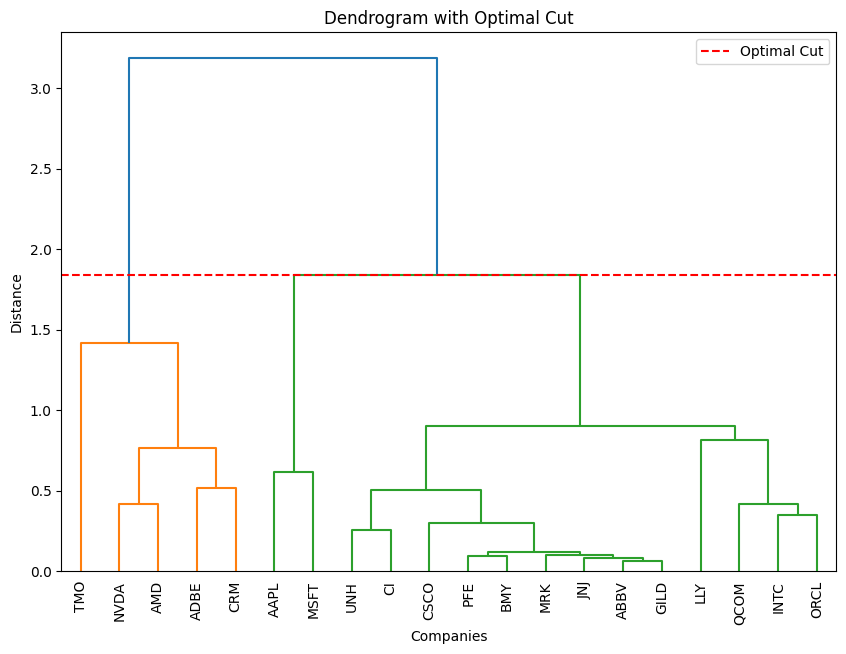

In [233]:
plt.figure(figsize=(10, 7))
dendrogram(selected_dissimilarity, labels=df[selected_companies].columns, leaf_rotation=90, leaf_font_size=10)
plt.axhline(y=selected_dissimilarity[-optimal_n_clusters, 2], color='r', linestyle='--', label='Optimal Cut')
plt.title('Dendrogram with Optimal Cut')
plt.xlabel('Companies')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [234]:
# experiment with different linkage methods for best silhouette score
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward']
linkage_outputs = []

for m in linkage_methods:
    # tech_dissimilarity_m = linkage(tech_data, method=m)
    # healthcare_dissimilarity_m = linkage(healthcare_data, method=m)
    selected_dissimilarity_m = linkage(dissimilarity_matrix.loc[selected_companies, selected_companies], method=m)
    linkage_outputs.append(selected_dissimilarity_m)

C:\Users\rajra\AppData\Local\Temp\ipykernel_11680\133277474.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  selected_dissimilarity_m = linkage(dissimilarity_matrix.loc[selected_companies, selected_companies], method=m)
C:\Users\rajra\AppData\Local\Temp\ipykernel_11680\133277474.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  selected_dissimilarity_m = linkage(dissimilarity_matrix.loc[selected_companies, selected_companies], method=m)
C:\Users\rajra\AppData\Local\Temp\ipykernel_11680\133277474.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  selected_dissimilarity_m = linkage(dissimilarity_matrix.loc[selected_companies, selected_companies], method=m)
C:\Users\rajra\AppData\Local\Temp\ipykernel_11680\133277474.py:8: ClusterWarning: The symme

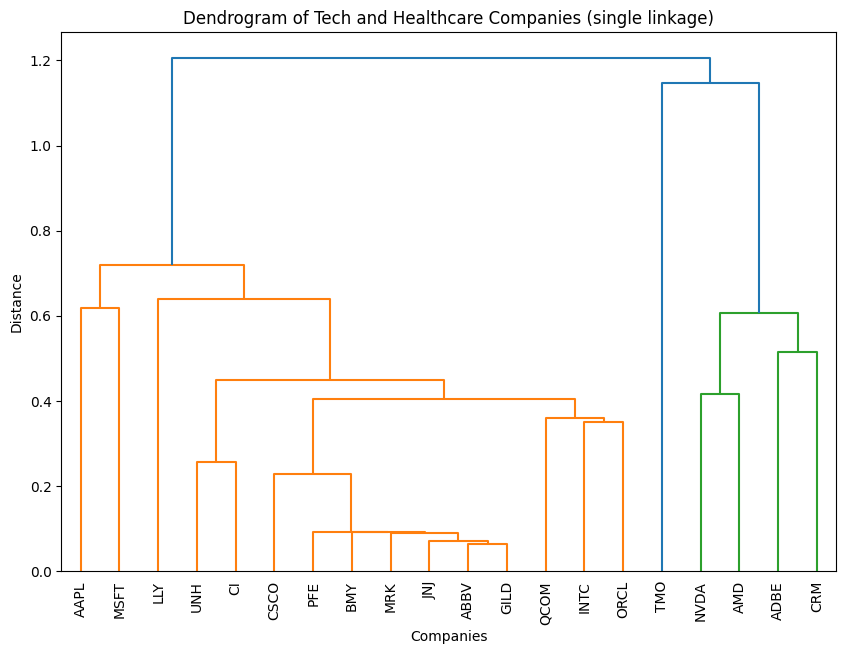

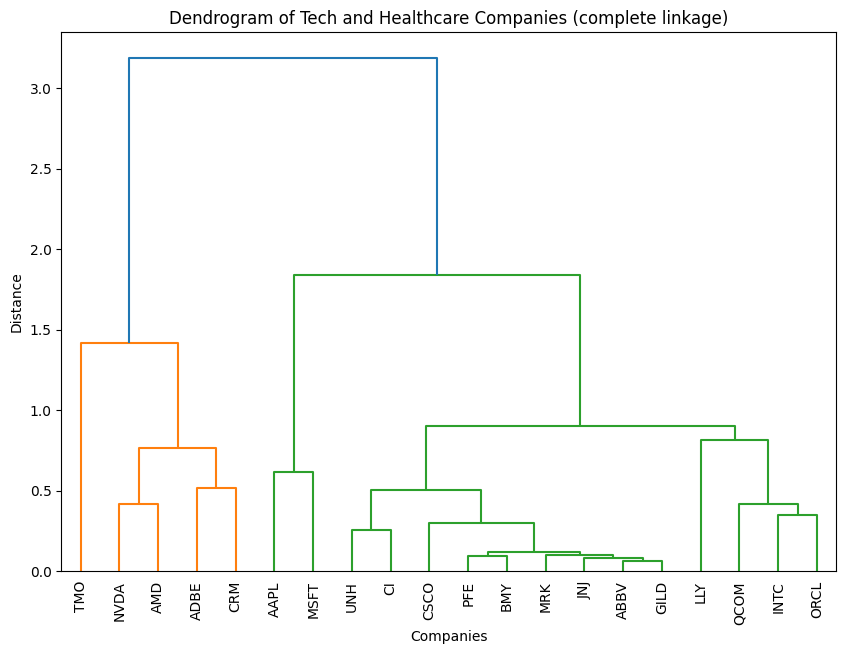

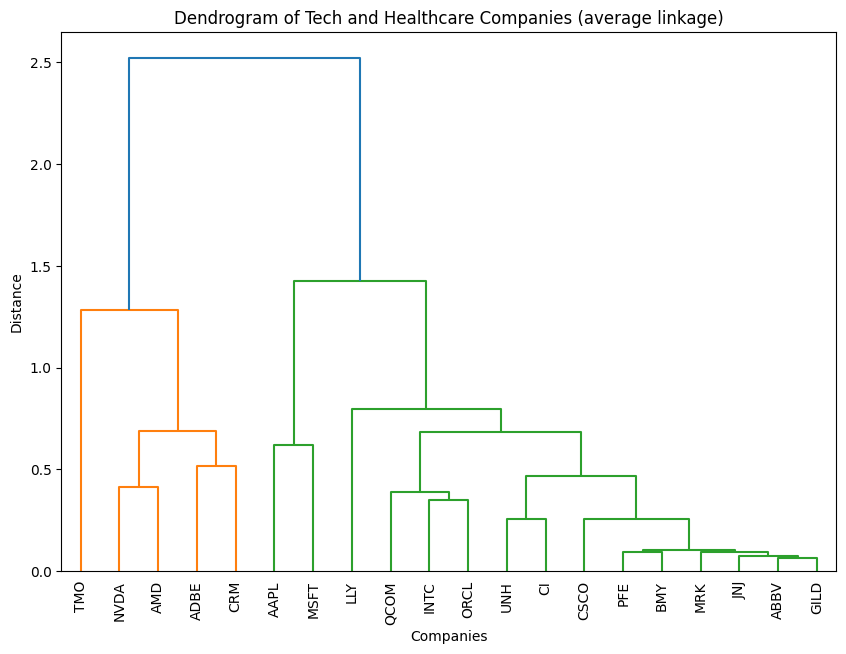

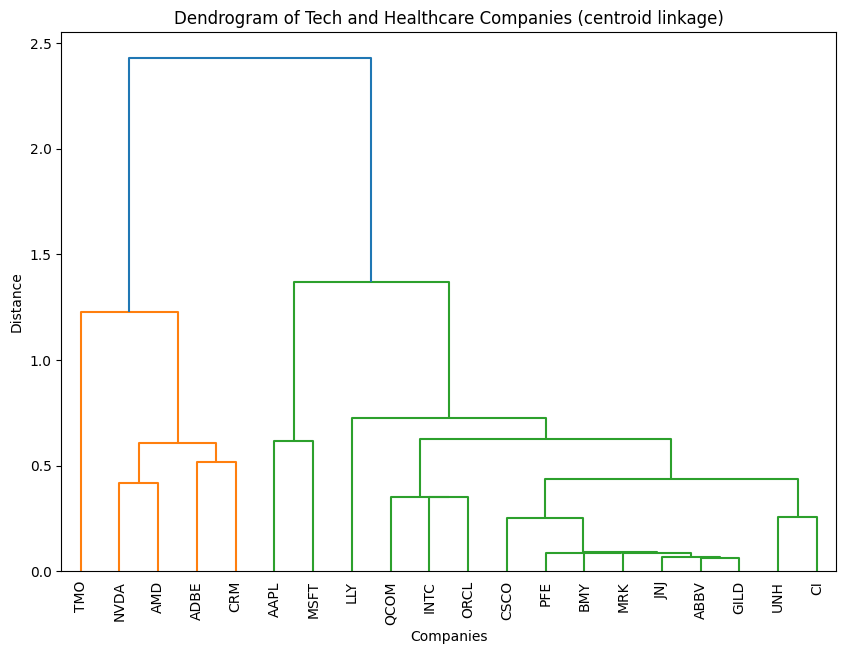

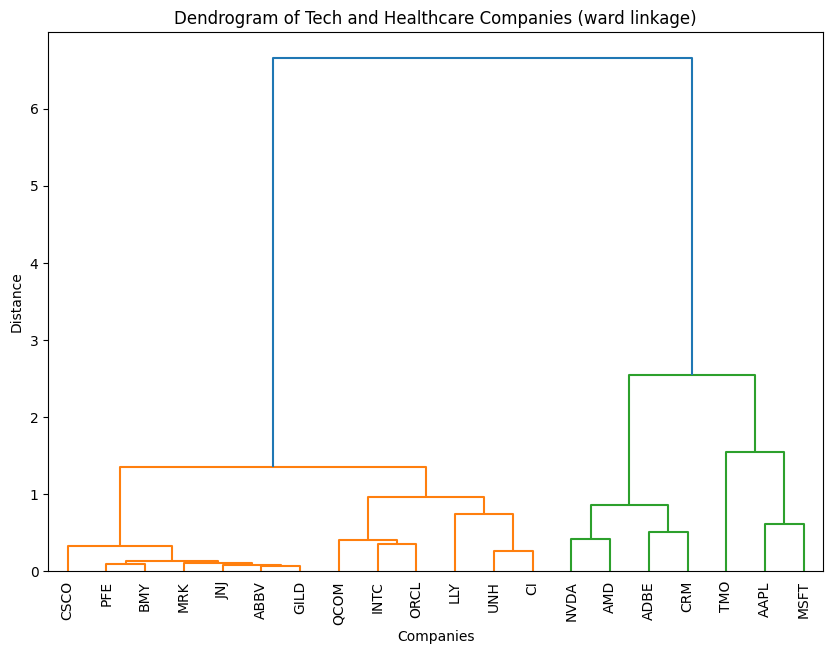

In [235]:
for i, m in enumerate(linkage_methods):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_outputs[i], labels=df[selected_companies].columns, leaf_rotation=90, leaf_font_size=10)
    plt.title(f'Dendrogram of Tech and Healthcare Companies ({m} linkage)')
    plt.xlabel('Companies')
    plt.ylabel('Distance')
    plt.show()

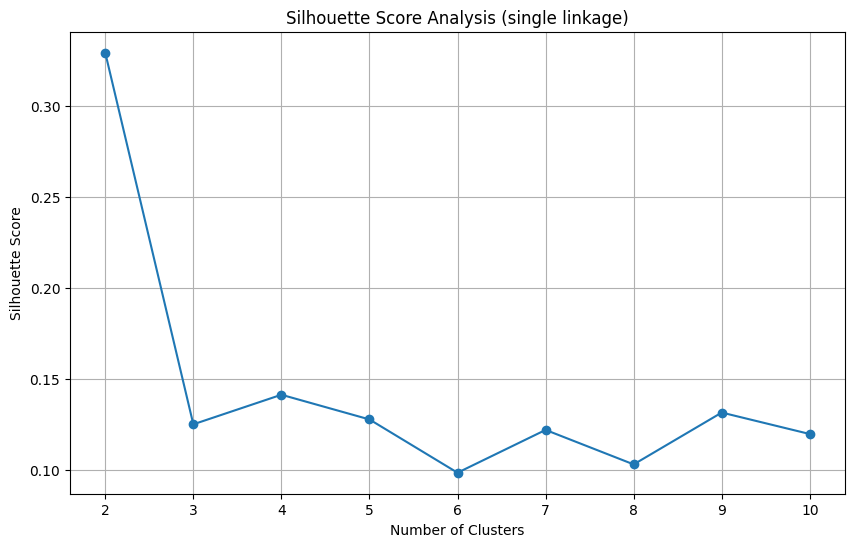

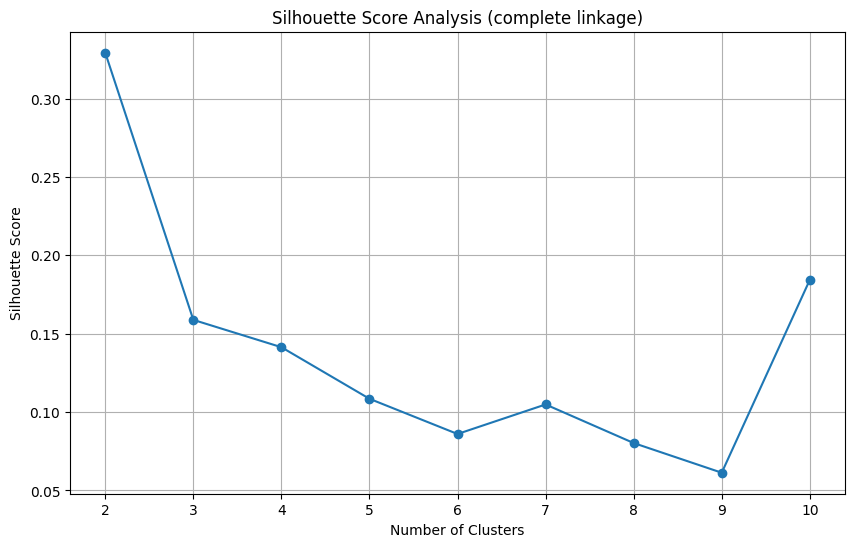

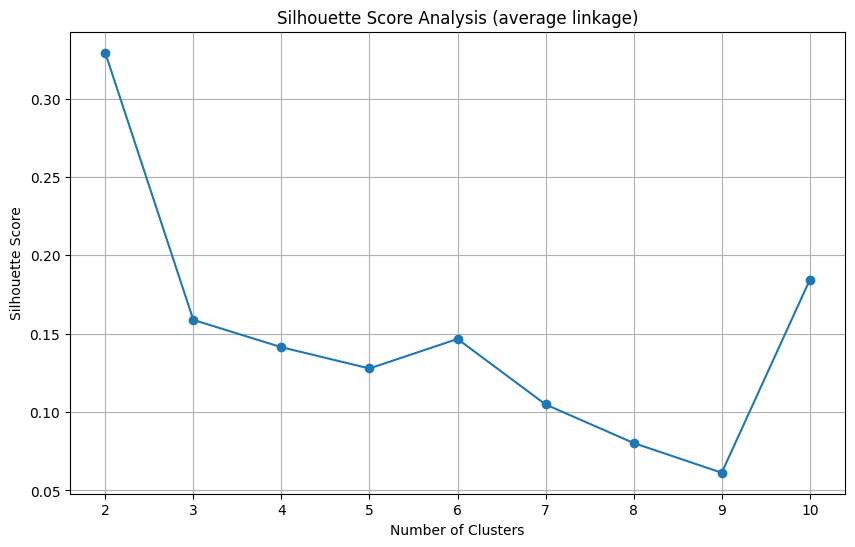

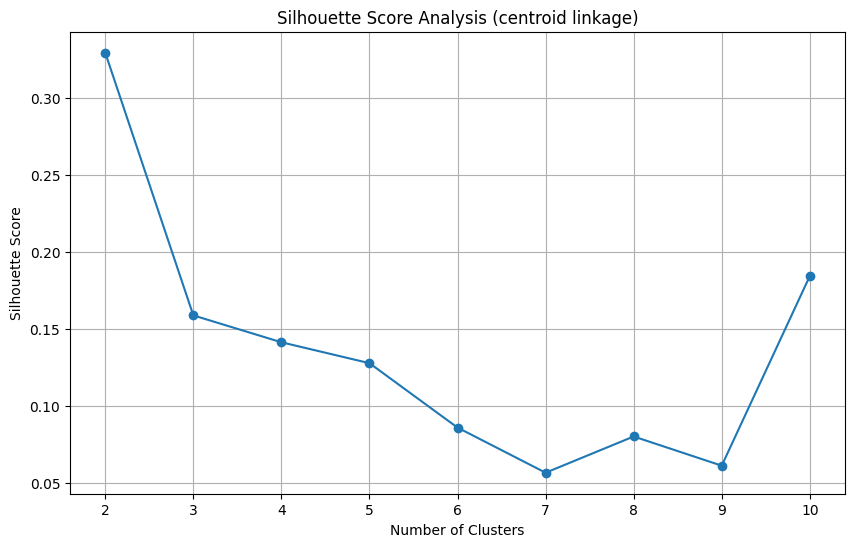

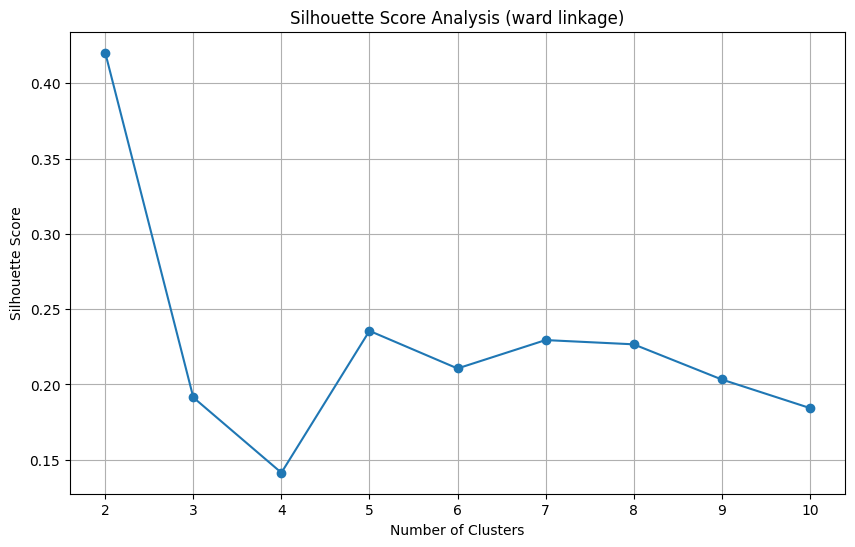

In [236]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11) # range of clusters to test
all_silhouette_scores = []

for i, m in enumerate(linkage_methods):
    silhouette_scores_m = []

    for n_clusters in range_n_clusters:
        # Apply Agglomerative Clustering with a specified number of clusters
        cluster_labels = fcluster(linkage_outputs[i], n_clusters, criterion='maxclust')

        # Calculate the silhouette score for each number of clusters
        score = silhouette_score(df[selected_companies].T, cluster_labels)
        silhouette_scores_m.append(score)
    
    all_silhouette_scores.append(silhouette_scores_m)

    plt.figure(figsize=(10, 6))
    plt.plot(range_n_clusters, silhouette_scores_m, marker='o')
    plt.title(f'Silhouette Score Analysis ({m} linkage)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

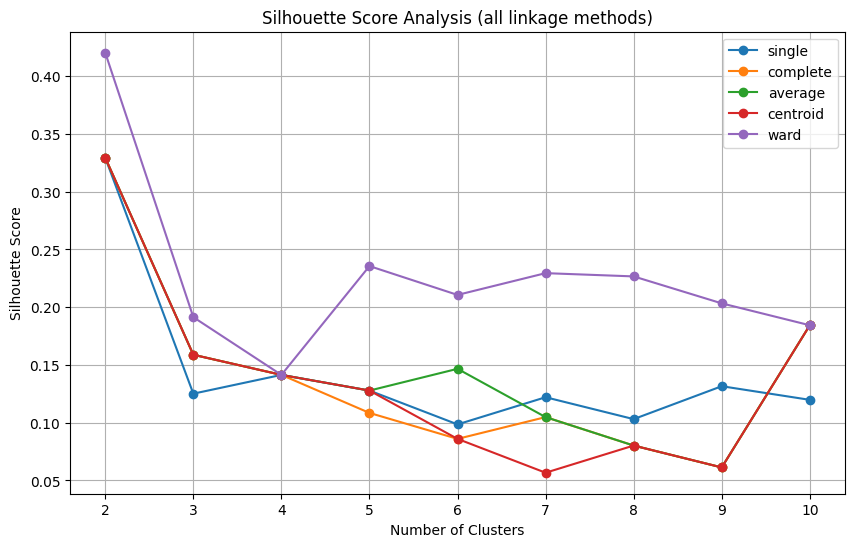

In [237]:
plt.figure(figsize=(10, 6))

for i, m in enumerate(linkage_methods):
    plt.plot(range_n_clusters, all_silhouette_scores[i], marker='o', label=m)

plt.legend()
plt.title(f'Silhouette Score Analysis (all linkage methods)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

C:\Users\rajra\AppData\Local\Temp\ipykernel_11680\313687868.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  selected_dissimilarity_m = linkage(dissimilarity_matrix, method=m)


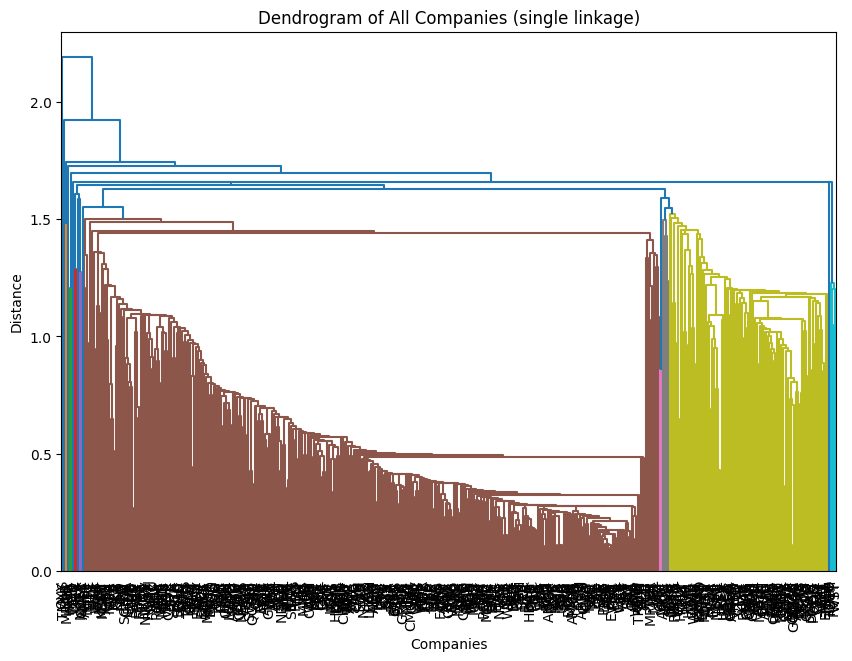

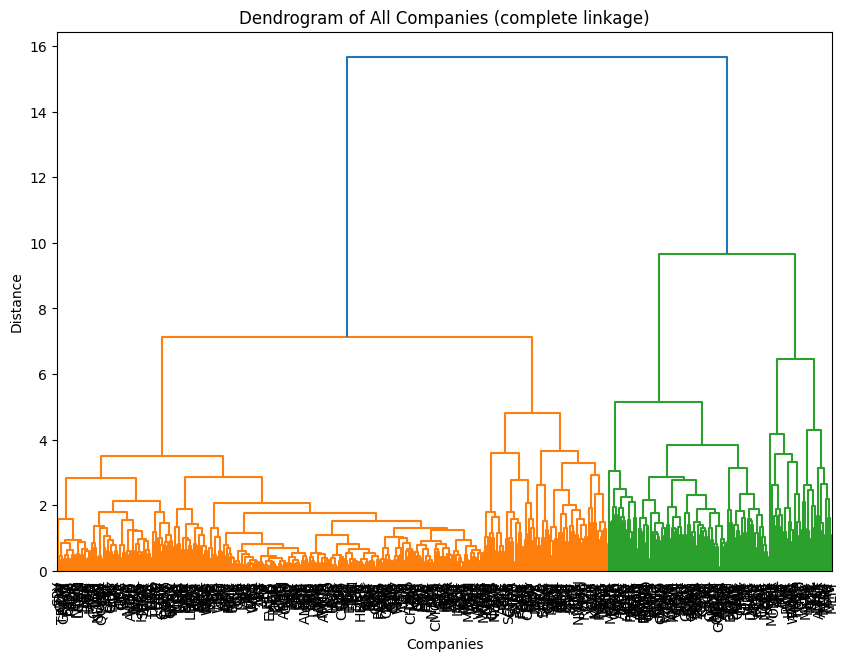

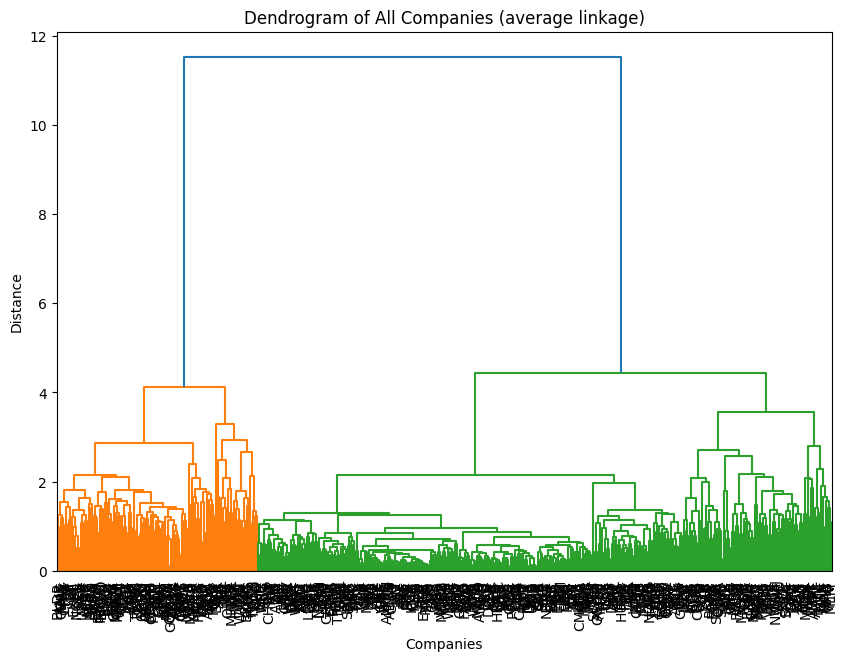

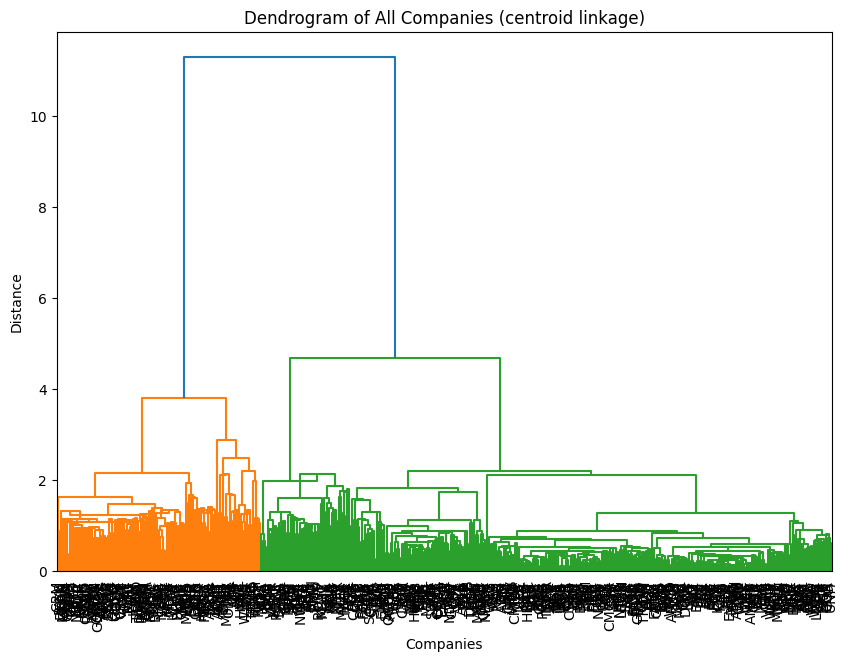

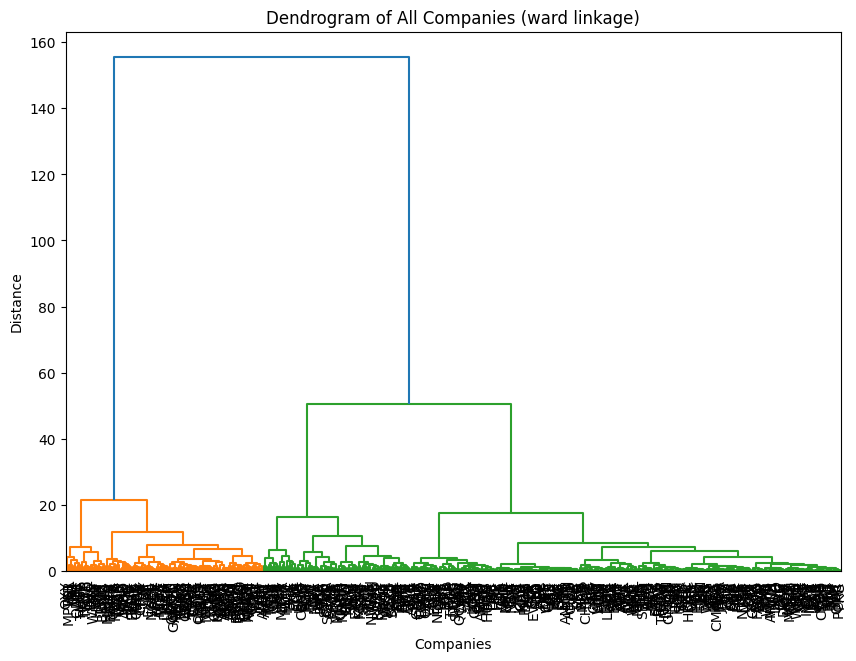

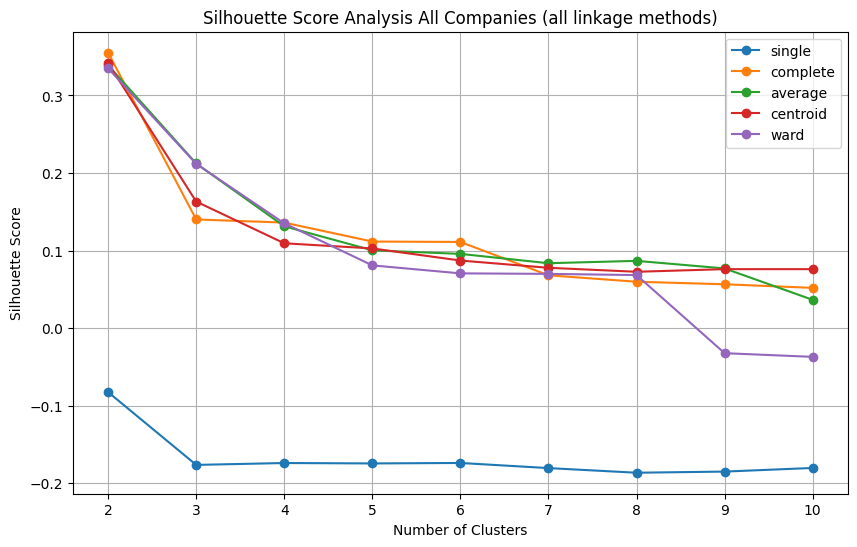

In [238]:
# extend linkage method testing, dendogram, and silhouette score analysis to all companies
linkage_outputs_all = []
for m in linkage_methods:
    selected_dissimilarity_m = linkage(dissimilarity_matrix, method=m)
    linkage_outputs_all.append(selected_dissimilarity_m)

for i, m in enumerate(linkage_methods):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_outputs_all[i], labels=df.columns, leaf_rotation=90, leaf_font_size=10)
    plt.title(f'Dendrogram of All Companies ({m} linkage)')
    plt.xlabel('Companies')
    plt.ylabel('Distance')
    plt.show()

silhouette_scores_all = []
for i, m in enumerate(linkage_methods):
    silhouette_scores_m = []

    for n_clusters in range_n_clusters:
        # Apply Agglomerative Clustering with a specified number of clusters
        cluster_labels = fcluster(linkage_outputs_all[i], n_clusters, criterion='maxclust')

        # Calculate the silhouette score for each number of clusters
        score = silhouette_score(df.T, cluster_labels)
        silhouette_scores_m.append(score)
    
    silhouette_scores_all.append(silhouette_scores_m)

plt.figure(figsize=(10, 6))

for i, m in enumerate(linkage_methods):
    plt.plot(range_n_clusters, silhouette_scores_all[i], marker='o', label=m)

plt.legend()
plt.title(f'Silhouette Score Analysis All Companies (all linkage methods)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [239]:
# get all of the companies in each cluster from using ward linkage method
optimal_linkage_method = 'ward'
optimal_n_clusters = 2

# Example data (replace with your actual dataset)
# Assume `data` is a pandas DataFrame containing the features of companies.
# data = pd.read_csv('your_data.csv')  # Load your dataset here
all_companies = df.columns
company_cluster_df = pd.DataFrame()
company_cluster_df['Company'] = all_companies

# Perform hierarchical clustering with Ward linkage
ward_linkage_output = linkage(dissimilarity_matrix, method=optimal_linkage_method)

# Cut the dendrogram to form 3 clusters (agglomerative clustering)
cluster_labels = fcluster(ward_linkage_output, optimal_n_clusters, criterion='maxclust')

# Add cluster labels to the original data
company_cluster_df['Cluster'] = cluster_labels

# Group companies by their cluster
clusters = company_cluster_df.groupby('Cluster')

# Print the companies in each cluster
for cluster_id, cluster_data in clusters:
    print(f"\nCluster {cluster_id}:")
    print(cluster_data)
    



Cluster 1:
    Company  Cluster
3      ACGL        1
5      ADBE        1
9      ADSK        1
17     AKAM        1
18      ALB        1
..      ...      ...
471     WBD        1
472     WDC        1
480     WST        1
483    WYNN        1
489    ZBRA        1

[125 rows x 2 columns]

Cluster 2:
    Company  Cluster
0      AAPL        2
1      ABBV        2
2       ABT        2
4       ACN        2
6       ADI        2
..      ...      ...
485     XOM        2
486     XYL        2
487     YUM        2
488     ZBH        2
490     ZTS        2

[366 rows x 2 columns]


C:\Users\rajra\AppData\Local\Temp\ipykernel_11680\2644286261.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  ward_linkage_output = linkage(dissimilarity_matrix, method=optimal_linkage_method)


In [240]:
# Perform hierarchical clustering using Ward linkage
optimal_linkage_method = 'ward'
optimal_n_clusters = 2

ward_linkage_output = linkage(dissimilarity_matrix, method=optimal_linkage_method)

# Cut the dendrogram to form clusters
cluster_labels = fcluster(ward_linkage_output, optimal_n_clusters, criterion='maxclust')

# Create a DataFrame mapping company names to their respective clusters
company_cluster_df = pd.DataFrame({
    'Company': all_companies,  # Replace with your actual list of company names
    'Cluster': cluster_labels
})

# Group companies by cluster
grouped = company_cluster_df.groupby('Cluster')['Company'].apply(list)

# Ensure all lists are the same length by padding with None
max_length = max(len(companies) for companies in grouped)
equal_length_clusters = {
    f"Cluster {cluster_id}": companies + [None] * (max_length - len(companies))
    for cluster_id, companies in grouped.items()
}

# Convert the dictionary into a DataFrame
clustered_df = pd.DataFrame(equal_length_clusters)

# Output the final DataFrame
clustered_df

C:\Users\rajra\AppData\Local\Temp\ipykernel_11680\2520104161.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  ward_linkage_output = linkage(dissimilarity_matrix, method=optimal_linkage_method)


,Cluster 1,Cluster 2
0,ACGL,AAPL
1,ADBE,ABBV
2,ADSK,ABT
3,AKAM,ACN
4,ALB,ADI
...,...,...
361,None,XOM
362,None,XYL
363,None,YUM
364,None,ZBH


In [241]:
clustered_df.to_csv("data/Cluster_data/2Clusters(2020-09-01_2024-09-01).csv")